In [1]:
import numpy as np
import scipy.fftpack as fft
import numpy.random as rnd
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
def create_sig(f, window_percent, shift, noise_var):
    # Create carrier waves
    PIT = 1  # Process Time
    Fs = 10e3  # Sampling Freq
    Freq = f  # Jammer Freq
    NumSamples = PIT * Fs  # Number of samples to process
    t = np.arange(0, NumSamples - 1, 1) / Fs  # time samples
    f = np.arange(0, NumSamples - 1, 1) / PIT  # Frequency Samples
    CWa = 1 * np.exp(2j * np.pi * Freq * t)  # Simulate a complex sin signal with specific frequency
    
    # zero pad and window the second signal, shift also
    sig_a = CWa
    window_size = int((window_percent)/100*len(sig_a))
    window_loc = int((NumSamples - window_size)/2)
    leading_zeros = np.zeros(window_loc + shift)
    trailing_zeros = np.zeros(window_loc - shift)
    sig_b = np.append(leading_zeros,sig_a[window_loc:window_loc+window_size])
    sig_b = np.append(sig_b, trailing_zeros)
    
    # Add noise idividually to each signal 
    var = noise_var
    sig_a = sig_a + np.sqrt(var) * rnd.randn(len(sig_a)) + np.sqrt(var) * 1j * rnd.randn(len(sig_a))
    sig_b = sig_b + np.sqrt(var) * rnd.randn(len(sig_b)) + np.sqrt(var) * 1j * rnd.randn(len(sig_b))
    
    # Plot the signals
    plt.figure()
    plt.title('Signals before corr')
    plt.plot(sig_a.real)
    plt.plot(sig_b.real)
    plt.legend(['sig_a', 'sig_b'])
    
    return sig_a, sig_b

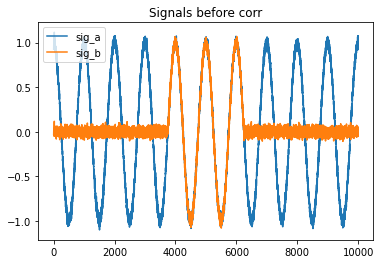

In [3]:
sig_a, sig_b = create_sig(10, 25, 0, 0.001)

# FFT Manual Correlation

cross correlation = inv_fft(fft(A) * conj(fft(B)))

In [4]:
def fft_ccor(a, b):
    fft_a = fft.fft(a)
    fft_b = np.conj((fft.fft(b)))
    fft_crosscorr = np.fft.ifft(np.fft.fftshift(fft_a * fft_b))
    return fft_crosscorr

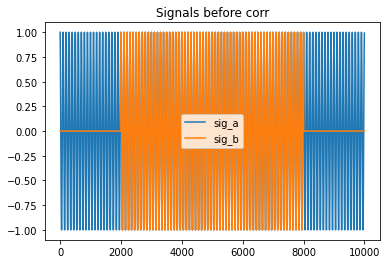

In [5]:
sig_a, sig_b = create_sig(100, 60, 0, 0)
# sig_c, sig_d = create_sig(10, 25, 400, 0.001)

In [6]:
cc_1 = fft_ccor(sig_a, sig_b)
# cc_2 = fft_ccor(sig_c, sig_d)

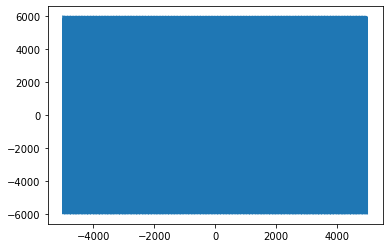

In [7]:

half_size = int(len(cc_1.real)/2)
shift = np.arange(-half_size, half_size+1)
plt.plot(shift, cc_1.real)
# plt.plot(cc_1.imag)

# plt.plot(cc_2.real)
# plt.plot(cc_2.imag)
# plt.xlim([-100,100])

In [8]:
x = np.arange(-10,10)
x

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

# Scipy correlation 

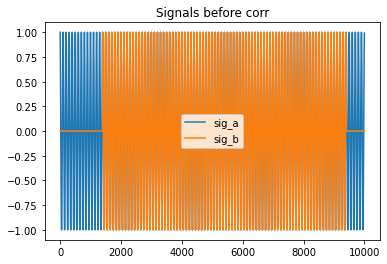

In [217]:
sig_a, sig_b = create_sig(100, 80, 400, 0.0)

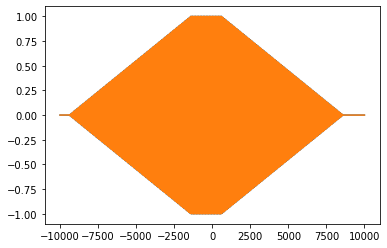

In [218]:
# Correlate

half_size = int(len(corr.real)/2)
shift = np.arange(-half_size, half_size+1)
corr = signal.correlate(sig_a, sig_b)
corr /= np.max(corr)
plt.plot(shift, corr.real)
plt.plot(shift, corr.imag)
# plt.plot(abs(corr))

# plt.xlim([-100, 100])

In [219]:
half_range = int(len(corr)/2)
t = list(range(-half_range,half_range+1))

In [212]:
t[np.argmax(corr.real)]

-200

(9988.0, 10008.0)

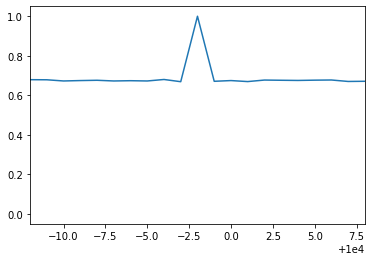

In [95]:
# Correlate
spike = np.argmax(corr.real)
plt.plot(abs(corr))
plt.xlim([spike-10, spike+10])

In [96]:
len(sig_b)- len(sig_a)
# len(sig_a)

0

In [97]:
fft_a = fft.fft(sig_a)
fft_b = np.conj((fft.fft(sig_b)))
# half_a = 2/len(fft_a)*fft_a[:len(fft_a)//2]
# half_b = 2/len(fft_b)*fft_b[:len(fft_b)//2]
# Normalize

# fft_a = 2/len(fft_a)*fft_a[:len(fft_a)//2]
# fft_b = 2/len(fft_b)*fft_a[:len(fft_b)//2]
# plt.plot(norm_fft_b)
# plt.xlim([150,250])

double_fft = norm_fft_a * norm_fft_b
inv_fft = np.fft.ifft(double_fft)
plt.plot((inv_fft.real))

In [114]:
double_fft = np.fft.fftshift(fft_a * fft_b)
# half = double_fft[:len(double_fft)//2]
# flipped = np.append(half, np.flip(half))
inv_fft = np.fft.ifft(double_fft)
shifted_res = np.fft.fftshift(inv_fft)

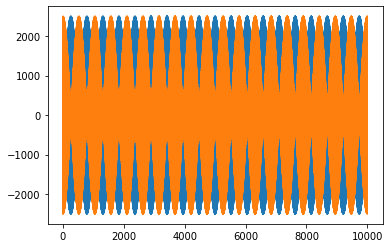

In [115]:
plt.figure()
plt.plot(shifted_res.real)
plt.plot(shifted_res.imag)
# plt.plot(abs(shifted_res))
# plt.xticks(np.arange(-int(len(inv_fft)/2), int(len(inv_fft)/2+1)))

# plt.xlim([4975, 5000])
plt.show()


In [116]:
half_range = int(len(shifted_res)/2)
t = list(range(-half_range,half_range+1))
t[np.argmax(abs(shifted_res))]

2509